<a href="https://colab.research.google.com/github/SriRamapriyan/intelunnati_Matrix/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

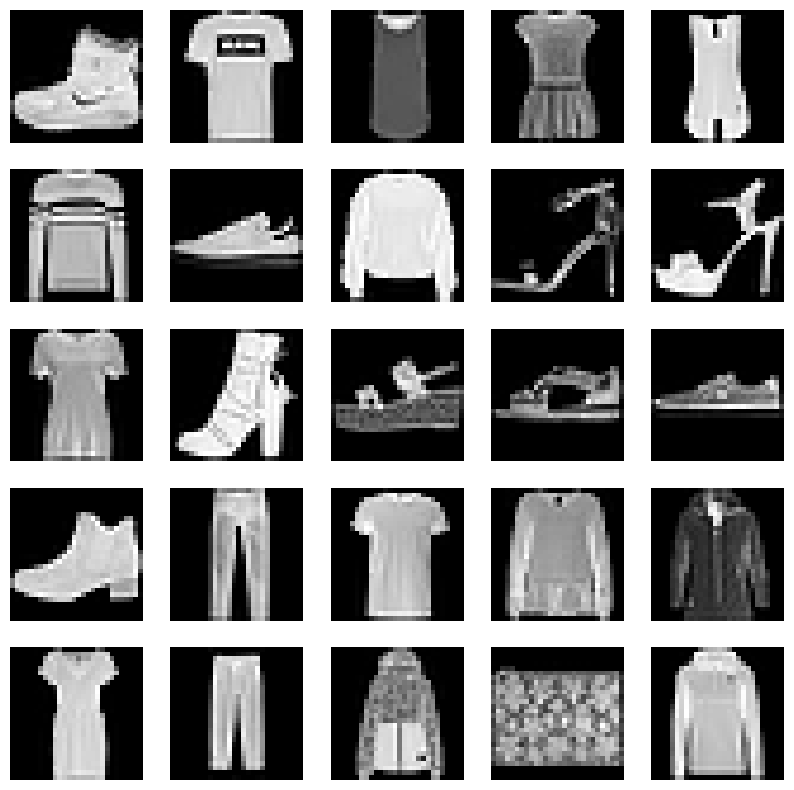

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
375/375 [==============================] - 32s 82ms/step - loss: 0.5949 - accuracy: 0.7879 - val_loss: 0.4381 - val_accuracy: 0.8431
Epoch 2/10
375/375 [==============================] - 32s 85ms/step - loss: 0.3707 - accuracy: 0.8673 - val_loss: 0.3507 - val_accuracy: 0.8783
Epoch 3/10
375/375 [==============================] - 30s 81ms/step - loss: 0.3216 - accuracy: 0.8842 - val_loss: 0.3200 - val_accuracy: 0.8847
Epoch 4/10
375/375 [==============================] - 30s 79ms/step - loss: 0.2894 - accuracy: 0.8952 - val_loss: 0.3068 - val_accuracy: 0.8892
Epoch 5/10
375/375 [==============================] - 30s 79ms/step - loss: 0.2654 - accuracy: 0.9033 - val_loss: 0.2743 - val_accuracy: 0.9009
Epoch 6/10
375/375 [==============================] - 31s 81ms/step - loss: 0.2421 - accuracy: 0.9123 - val_loss: 0.2811 - val_accuracy: 0.9003
Epoch 7/10
375/375 [==============================] - 28s 75ms/step - loss: 0.2227 - accuracy: 0.9177 - val_loss: 0.2633 - val_accuracy:

In [9]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.2642 - accuracy: 0.9058
Test Accuracy: 0.9057999849319458


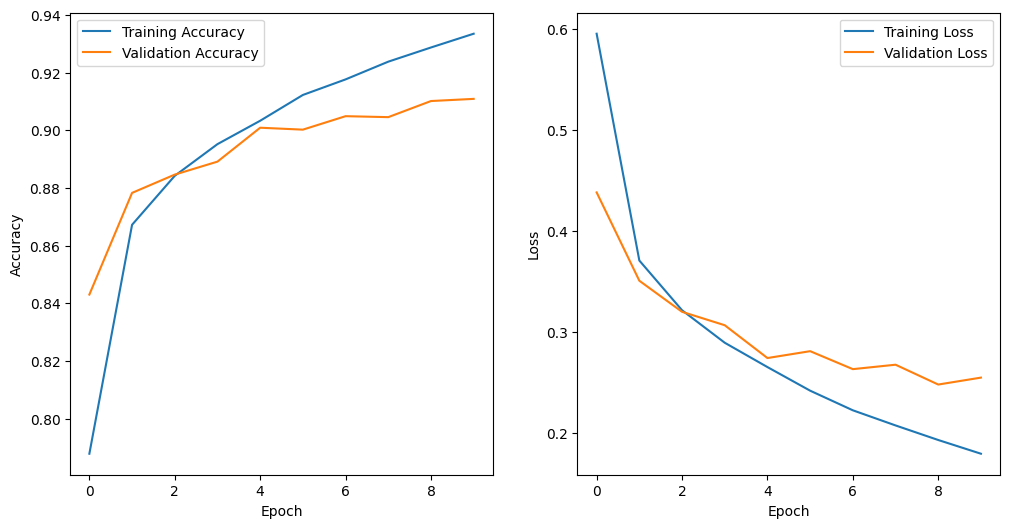

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()